<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/notebooks/pcb_experiments/Video_velocity_analysis_GT_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing mouse velocity
* 8/27 setting up
* 9/4 added to `fiberphotometry` repo
* 7/10/24 review by GT, refactored too.
* 7/10/24 GT. The averaged coordinate calculation did not look correct. we would need one set of averaged X coordinate for all parts and one set of averaged coordinates for Y. Switched back to one body part for now. The tracking looks relatively noisy, we need to try to clean it up by getting rig all of those x=0 y=0 points.

In [ ]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd sleep
!pip install .

Cloning into 'sleep'...
remote: Enumerating objects: 1125, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (304/304), done.
remote: Total 1125 (delta 312), reused 324 (delta 188), pack-reused 625
Receiving objects: 100% (1125/1125), 33.68 MiB | 13.98 MiB/s, done.
Resolving deltas: 100% (674/674), done.
/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.11-py3-none-any.whl size=1011 sha256=6c118a142cc46eadcd768714cefe4cee46e66fd3fe18363c6220a5e1656fae89
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zs450mu/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep


In [ ]:
%cd /content/sleep/
!pip install .

/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.11-py3-none-any.whl size=1011 sha256=b02c42b0a50e37db3b3305fd298b469f9e4a7403b0d68683abfd29d210630803
  Stored in directory: /tmp/pip-ephem-wheel-cache-3u8ysoxi/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep
  Attempting uninstall: sleep
    Found existing installation: sleep 0.11
    Uninstalling sleep-0.11:
      Successfully uninstalled sleep-0.11


In [ ]:
%cd ..

/content


In [ ]:
!git clone https://github.com/GergelyTuri/fiberphotometry.git

Cloning into 'fiberphotometry'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 328 (delta 40), reused 53 (delta 18), pack-reused 245
Receiving objects: 100% (328/328), 26.35 MiB | 25.48 MiB/s, done.
Resolving deltas: 100% (163/163), done.


In [ ]:
%cd /content/fiberphotometry/
!pip install .

/content/fiberphotometry
Processing /content/fiberphotometry
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for fiber-photometry-analysis: filename=fiber_photometry_analysis-0.1-py3-none-any.whl size=9270 sha256=1d46e6294569895950fc5bcee5a5d6efccb8b435df1aa04325e03553b80aa6c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-l0nawta6/wheels/4b/b6/cf/916d1f43d06b8bc573d2ec7471e525018bf5ea7bcf83b8e670
Successfully built fiber-photometry-analysis


In [ ]:
!pip install tdt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sleep.src.classes import core
from fiberphotometry.src import video, behavior_dlc

%matplotlib inline

In [ ]:
h5 = '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/analysis_0708/drug_experiment-240625-124323_jack-240627-105240_Cam1DLC_resnet50_pcb_testJul2shuffle1_1030000.h5'
tdt_path = '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/pcb_test-gergo-2024-07-02/videos/drug_experiment-240625-124323_jack-240627-105240_Cam1DLC_resnet50_pcb_testJul2shuffle1_1030000_labeled.mp4'

In [ ]:
vid = video.UsbVideo(tdt_path)
fr = vid.video_params['fps']
beh = behavior_dlc.Behavior(h5)
beh_df = beh.data

In [ ]:
x_coords = beh_df[(beh_df.columns.values[0][0],
                 'back1', 'x')]
y_coords = beh_df[(beh_df.columns.values[0][0],
                 'back1', 'y')]

In [ ]:
pdist = beh.pairwise_dist(x_coords)
dist_moved = beh.distance_moved(x_coords,
               y_coords)
dist_moved.sum()

112902.92498706361

20.907561894606324

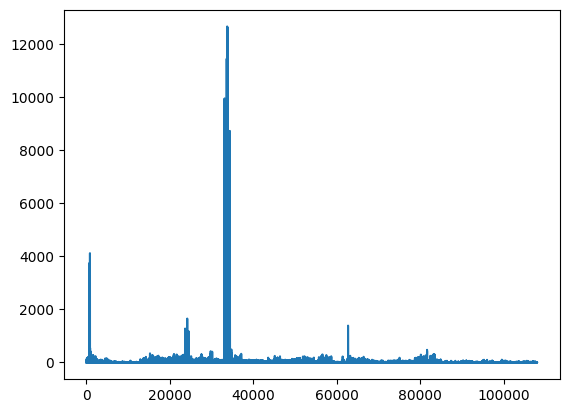

In [ ]:
velo = beh.compute_velocity(x_coords, y_coords, fr)
mean_velo = velo.mean()
velo.plot()
mean_velo

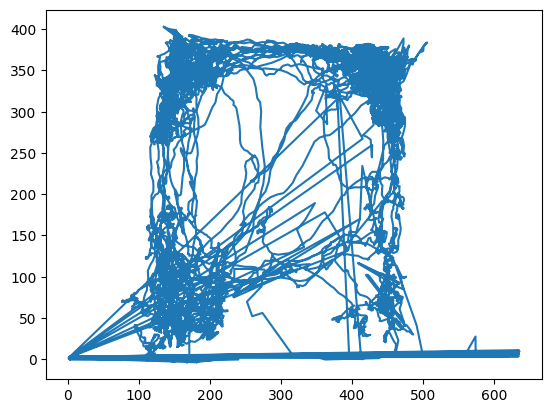

In [ ]:
plt.plot(x_coords, y_coords)

0.03081395887151283

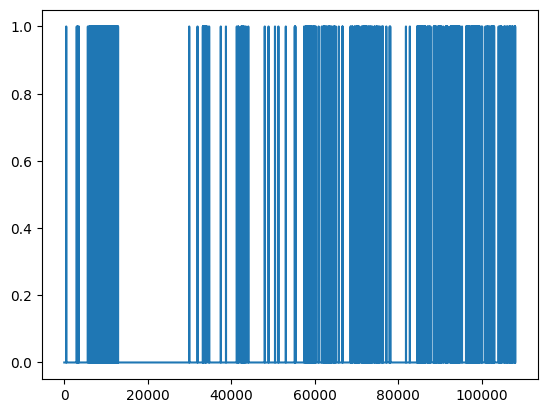

In [ ]:
mob = beh.define_immobility(x_coords, y_coords)
mob.plot()
perc_immob = mob.sum()/len(mob)
perc_immob

(-0.1, 1.2)

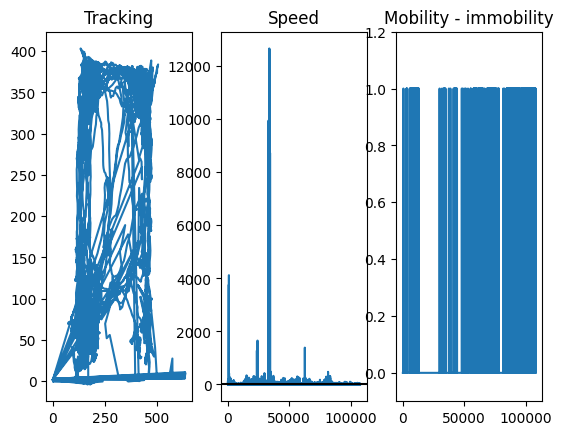

In [ ]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(x_coords, y_coords)
axs[0].set_title('Tracking')
dist = beh.distance_moved(x_coords, y_coords)
x = np.linspace(0, len(beh_df.index), num=len(beh_df.index))
velo = beh.compute_velocity(x_coords, y_coords, fr)
axs[1].plot(x, velo)
axs[1].axhline(velo.mean(), color='k', label='ok')
axs[1].set_title('Speed')
# axs[1].set_ylim((-0.1, 10))

mob_immob = beh.define_immobility(x_coords, y_coords)
axs[2].plot(x, mob_immob)
axs[2].set_title('Mobility - immobility')
axs[2].set_ylim((-0.1, 1.2))

# # Save the figure
# fig.savefig('tracking_analysis.png', dpi=300, bbox_inches='tight')
